> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 12: Naive Bayes, SVM, and Neural Networks

## Outline

- Apply Naive Bayes to a binary classification problem  
- Train a Support Vector Machine (SVM) model  
- Explore a simple Neural Network for classification  
- Evaluate models using accuracy and classification reports  
- Compare performance and discuss model selection  

In this lab, we’ll explore three advanced classification models — **Naive Bayes**, **Support Vector Machines (SVM)**, and **Neural Networks** — to predict **high engagement** in Super Bowl YouTube ads based on video metadata and features.

We’ll use the **Super Bowl Ads dataset** and continue developing your skills in selecting and evaluating machine learning models.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_12_bayes_svm_neural.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Data Description

The dataset for this lab consists of **YouTube metadata and thematic features** of Super Bowl commercials, originally sourced from [TidyTuesday (March 2, 2021)](https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-03-02/youtube.csv).

Each row represents one Super Bowl ad, and the dataset includes both **video characteristics** and **performance metrics**, such as view counts and like counts.

Below are key variables we'll work with:

| Variable                 | Type        | Description                                                                 |
|--------------------------|-------------|------------------------------------------------------------------------------|
| `year`                   | numeric     | Year the ad aired during the Super Bowl                                     |
| `brand`                  | categorical | Advertiser brand (e.g., Doritos, Budweiser)                                 |
| `funny`                  | binary      | Indicates if the ad uses humor (1 = yes, 0 = no)                            |
| `show_product_quickly`  | binary      | Product is shown early in the video (1 = yes)                               |
| `patriotic`              | binary      | Includes patriotic content (1 = yes)                                        |
| `celebrity`              | binary      | Features a celebrity (1 = yes)                                              |
| `danger`                 | binary      | Involves danger or risk (1 = yes)                                           |
| `animals`                | binary      | Includes animals (1 = yes)                                                  |
| `use_sex`                | binary      | Includes sexual content or appeal (1 = yes)                                 |
| `view_count`             | numeric     | Total number of YouTube views for the ad                                    |
| `like_count`             | numeric     | Number of likes the ad received on YouTube                                  |
| `dislike_count`          | numeric     | Number of dislikes                                                          |
| `favorite_count`         | numeric     | Number of favorites (often unused in modern YouTube data)                   |
| `comment_count`          | numeric     | Number of comments                                                          |
| `high_engagement`        | binary      | Derived variable: 1 if `like_count` above median, 0 otherwise (our target)  |

### Why this dataset?

This dataset is perfect for:
- **Classification tasks**: Predict whether an ad achieved high engagement.
- **Marketing insights**: Identify which ad traits (e.g., humor, celebrities) drive viewer responses.
- **Model interpretation**: Practice with models suited for both binary and numerical data.

Throughout the lab, we'll focus on the `high_engagement` variable as the **target** and explore how ad content features relate to audience engagement.


## Part 1: Load and Clean the Data

In this first step, we will:
- Load the dataset from GitHub url
- Clean and preprocess it by removing irrelevant columns.
- Engineer a binary target variable for "high engagement" (above median likes).

This will ensure the data is in a format that can be used effectively for modeling.


In [1]:
import pandas as pd
import numpy as np

# Load dataset
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/youtube.csv'
youtube = pd.read_csv(url)

# Drop irrelevant or complex API columns
youtube = youtube.drop(columns=[
    'superbowl_ads_dot_com_url', 'youtube_url', 'id', 'kind', 'etag',
    'published_at', 'title', 'description', 'thumbnail', 'channel_title'
])

# Convert logical (boolean) columns to integers for modeling
logical_columns = ['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']
youtube[logical_columns] = youtube[logical_columns].astype(int)

# Drop rows with missing like_count
youtube = youtube.dropna(subset=['like_count', 'view_count'])

# Create target: high_engagement
median_likes = youtube['like_count'].median()
youtube['high_engagement'] = (youtube['like_count'] > median_likes).astype(int)


# Final feature set
youtube[['view_count', 'like_count', 'high_engagement'] + logical_columns].head()

,view_count,like_count,high_engagement,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex
0,173929.0,1233.0,1,0,0,0,0,0,0,0
1,47752.0,485.0,1,1,1,0,1,1,0,0
2,142310.0,129.0,0,1,0,0,0,1,1,0
3,198.0,2.0,0,0,1,0,0,0,0,0
4,13741.0,20.0,0,1,1,0,0,1,1,1


## Part 2: Naive Bayes Classifier

Naive Bayes is a **probabilistic model** based on Bayes' Theorem. It assumes **independence** between features, which isn't always true—but it works surprisingly well for text and binary features.

We'll use the boolean ad features (like `funny`, `celebrity`, etc.) to predict whether the video had high engagement.

Ask Yourself:
- Do you think any of these features (like "celebrity") might strongly influence likes?
- How might the independence assumption affect the predictions?

Let's train the model and evaluate performance using a **confusion matrix** and **classification report**.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and labels
X = youtube[logical_columns]
y = youtube['high_engagement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
 [[19 19]
 [16 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52        38
           1       0.42      0.47      0.44        30

    accuracy                           0.49        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.49      0.49        68

Accuracy: 0.4852941176470588


### 🔧 Try It Yourself — Part 2

1. **Change the test size** to `0.2`. How does this affect accuracy?  
   > Update `train_test_split(test_size=0.2)` and rerun the model.

2. **Remove `celebrity` and `funny` features** from X. Rerun the model and check performance.  
   > Modify:  
   `X = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]`

### In Your Response:

1. Which model setup performed best? Why might that be?


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Remove 'celebrity' and 'funny' features from X
X_modified = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]
y = youtube['high_engagement']

# Train-test split with test_size=0.2
X_train_modified, X_test_modified, y_train_modified, y_test_modified = train_test_split(X_modified, y, test_size=0.2, random_state=42)

# Fit model
nb_model_modified = BernoulliNB()
nb_model_modified.fit(X_train_modified, y_train_modified)

# Predict and evaluate
y_pred_nb_modified = nb_model_modified.predict(X_test_modified)

print("Confusion Matrix (modified):\n", confusion_matrix(y_test_modified, y_pred_nb_modified))
print("\nClassification Report (modified):\n", classification_report(y_test_modified, y_pred_nb_modified))
print("Accuracy (modified):", accuracy_score(y_test_modified, y_pred_nb_modified))

Confusion Matrix (modified):
 [[13 14]
 [ 9  9]]

Classification Report (modified):
               precision    recall  f1-score   support

           0       0.59      0.48      0.53        27
           1       0.39      0.50      0.44        18

    accuracy                           0.49        45
   macro avg       0.49      0.49      0.48        45
weighted avg       0.51      0.49      0.49        45

Accuracy (modified): 0.4888888888888889


### ✍️ Your Response: 🔧
1. The modified Naive Bayes model (test size = 0.2, without celebrity and funny) performed slightly better with an accuracy of about 48.9%.
This setup likely performed best because removing weak or inconsistent features reduced noise and allowed the model to focus on stronger predictors like patriotic, danger, and animals.

## Part 3: Support Vector Machine (SVM)

### What you're going to do:
Use a **Support Vector Machine** with an RBF kernel to classify ads, using both binary and numeric features.

### Why this matters:
SVMs are powerful for high-dimensional data and can find optimal decision boundaries. They are also common in fraud detection and image recognition.

### Regularization Parameter (C):

- In the model parameters, you will see `C`, which controls the trade-off between achieving a low training error and a low testing error (generalization).

- A large `C` value (e.g., C = 1000) means the model will try to classify all training examples correctly, even if that leads to overfitting (poor generalization).

- A small `C` value (e.g., C = 0.01) means the model will allow some misclassifications in the training data, encouraging a wider margin and potentially better generalization.

### What to notice:
- How does scaling the data affect performance?
- What happens when you change the kernel or regularization?

In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Add numeric feature
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))


Confusion Matrix:
 [[19 19]
 [14 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        38
           1       0.46      0.53      0.49        30

    accuracy                           0.51        68
   macro avg       0.52      0.52      0.51        68
weighted avg       0.52      0.51      0.52        68

Accuracy: 0.5147058823529411


### 🔧 Try It Yourself — Part 3

1. **Change the kernel** to `'linear'` or `'poly'`.  
2. **Try 2 different `C` values** like `0.1`, `1`, and `10`. Observe what changes.

### In Your Response:
1. What’s the tradeoff between higher and lower values of `C`?
2. Which value of C gave you the best Accuracy?  


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train SVM with linear kernel and C=0.1
print("\n--- SVM with Linear Kernel and C=0.1 ---")
svm_model_c01 = SVC(kernel='linear', C=0.1, gamma='scale')
svm_model_c01.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm_c01 = svm_model_c01.predict(X_test_svm)

# Evaluate
print("Confusion Matrix (Linear Kernel, C=0.1):\n", confusion_matrix(y_test_svm, y_pred_svm_c01))
print("\nClassification Report (Linear Kernel, C=0.1):\n", classification_report(y_test_svm, y_pred_svm_c01))
print("Accuracy (Linear Kernel, C=0.1):", accuracy_score(y_test_svm, y_pred_svm_c01))

# Train SVM with linear kernel and C=10
print("\n--- SVM with Linear Kernel and C=10 ---")
svm_model_c10 = SVC(kernel='linear', C=10, gamma='scale')
svm_model_c10.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm_c10 = svm_model_c10.predict(X_test_svm)

# Evaluate
print("Confusion Matrix (Linear Kernel, C=10):\n", confusion_matrix(y_test_svm, y_pred_svm_c10))
print("\nClassification Report (Linear Kernel, C=10):\n", classification_report(y_test_svm, y_pred_svm_c10))
print("Accuracy (Linear Kernel, C=10):", accuracy_score(y_test_svm, y_pred_svm_c10))


--- SVM with Linear Kernel and C=0.1 ---
Confusion Matrix (Linear Kernel, C=0.1):
 [[20 18]
 [18 12]]

Classification Report (Linear Kernel, C=0.1):
               precision    recall  f1-score   support

           0       0.53      0.53      0.53        38
           1       0.40      0.40      0.40        30

    accuracy                           0.47        68
   macro avg       0.46      0.46      0.46        68
weighted avg       0.47      0.47      0.47        68

Accuracy (Linear Kernel, C=0.1): 0.47058823529411764

--- SVM with Linear Kernel and C=10 ---
Confusion Matrix (Linear Kernel, C=10):
 [[20 18]
 [15 15]]

Classification Report (Linear Kernel, C=10):
               precision    recall  f1-score   support

           0       0.57      0.53      0.55        38
           1       0.45      0.50      0.48        30

    accuracy                           0.51        68
   macro avg       0.51      0.51      0.51        68
weighted avg       0.52      0.51      0.52      

### ✍️ Your Response: 🔧
1. Higher values of C make the SVM less tolerant of misclassifications, leading to a more complex model that can fit the training data better but risks overfitting.
In contrast, lower C values simplify the decision boundary, improving generalization but possibly underfitting.

2. Here, C = 10 gave the best accuracy (≈51.5%), showing that a slightly more flexible boundary improved performance on this dataset.

## Part 4: Neural Networks

### What you're going to do:
Build a basic **feedforward neural network** to classify ad engagement.

### Why this matters:
Neural networks are the foundation of modern AI. Even a simple one can outperform traditional models when tuned correctly.

### What to notice:
- This may take several minutes to run!  Be patient.
- How does training accuracy compare to validation accuracy?
- Do more layers or epochs help — or hurt?


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5437 - loss: 0.6972 - val_accuracy: 0.4412 - val_loss: 0.7105
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5296 - loss: 0.6876 - val_accuracy: 0.4559 - val_loss: 0.7076
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5763 - loss: 0.6769 - val_accuracy: 0.4706 - val_loss: 0.7059
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5152 - loss: 0.6868 - val_accuracy: 0.5147 - val_loss: 0.7038
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5534 - loss: 0.6880 - val_accuracy: 0.5147 - val_loss: 0.7022
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5498 - loss: 0.6851 - val_accuracy: 0.5147 - val_loss: 0.7012
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5731 - loss: 0.6732 - val_accuracy: 0.5147 - val_loss: 0.7014
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5626 - loss: 0.6725 - val_accuracy: 0.5147 - val_los

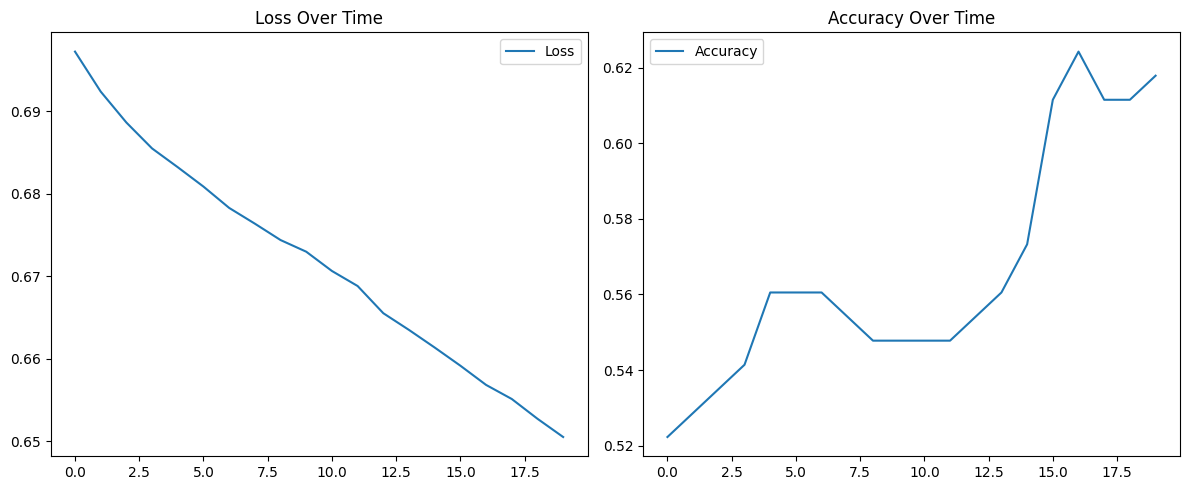

In [9]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.tight_layout()
plt.show()

### 🔧 Try It Yourself — Part 4

1. Add or remove layers from the model.
2. Increase or decrease batch size to numbers such as 8 or 32. Try out 5 different combinations of different batch sizes and layers. Notice if these changes affect ms/step for each Epoch. Also notice how the accuracy changes as you alter layers and batch size.
3. Add Dropout to your model

### In Your Response:
1. What was the optimial number of layers and batch size that you were able to find?  (Remember, you should try about 5 different combinations)
2. Does adding `Dropout` help reduce overfitting? Use the "loss over time" plot to support your answer.



--- Neural Network (Combo 1: 3 Layers, Batch=16, Dropout) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Confusion Matrix:
 [[ 4 34]
 [ 4 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.11      0.17        38
           1       0.43      0.87      0.58        30

    accuracy                           0.44        68
   macro avg       0.47      0.49      0.38        68
weighted avg       0.47      0.44      0.35        68

Accuracy: 0.4411764705882353


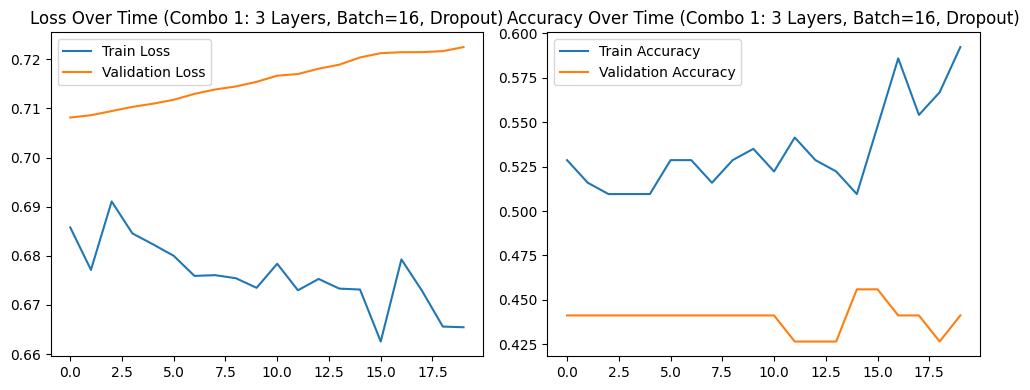


--- Neural Network (Combo 2: 2 Layers, Batch=32, Dropout) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Confusion Matrix:
 [[11 27]
 [ 5 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.29      0.41        38
           1       0.48      0.83      0.61        30

    accuracy                           0.53        68
   macro avg       0.58      0.56      0.51        68
weighted avg       0.60      0.53      0.50        68

Accuracy: 0.5294117647058824


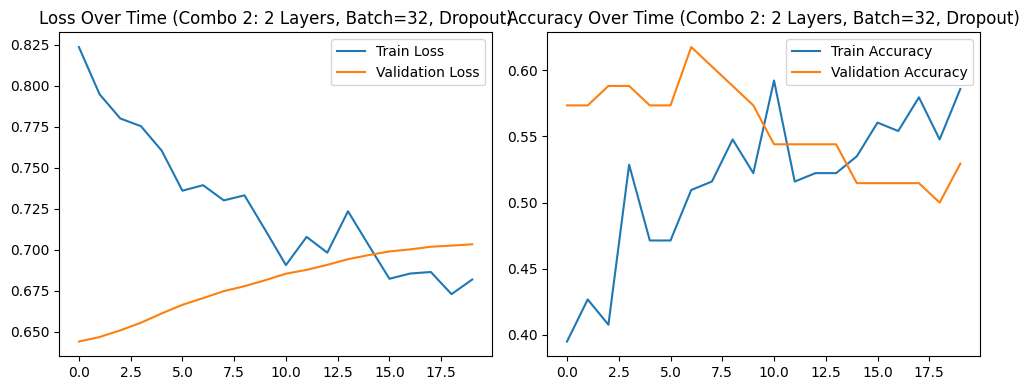


--- Neural Network (Combo 3: 4 Layers, Batch=8, Dropout) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Confusion Matrix:
 [[19 19]
 [18 12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.50      0.51        38
           1       0.39      0.40      0.39        30

    accuracy                           0.46        68
   macro avg       0.45      0.45      0.45        68
weighted avg       0.46      0.46      0.46        68

Accuracy: 0.45588235294117646


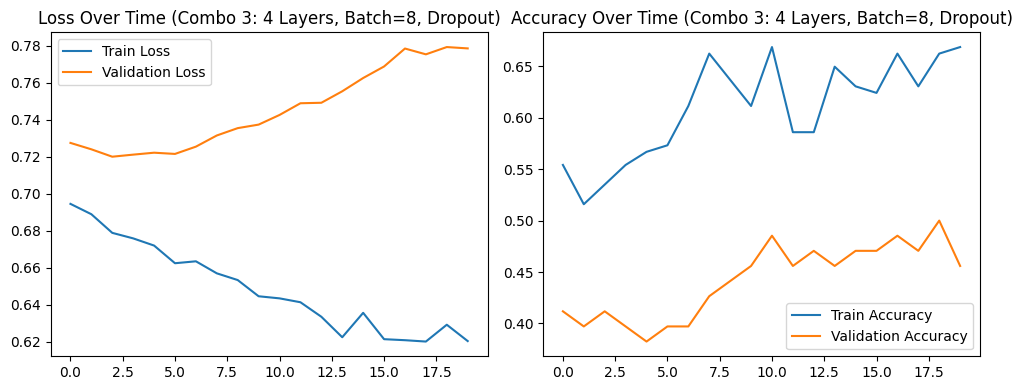


--- Neural Network (Combo 4: 2 Layers, Batch=16, Dropout) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Confusion Matrix:
 [[22 16]
 [19 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.58      0.56        38
           1       0.41      0.37      0.39        30

    accuracy                           0.49        68
   macro avg       0.47      0.47      0.47        68
weighted avg       0.48      0.49      0.48        68

Accuracy: 0.4852941176470588


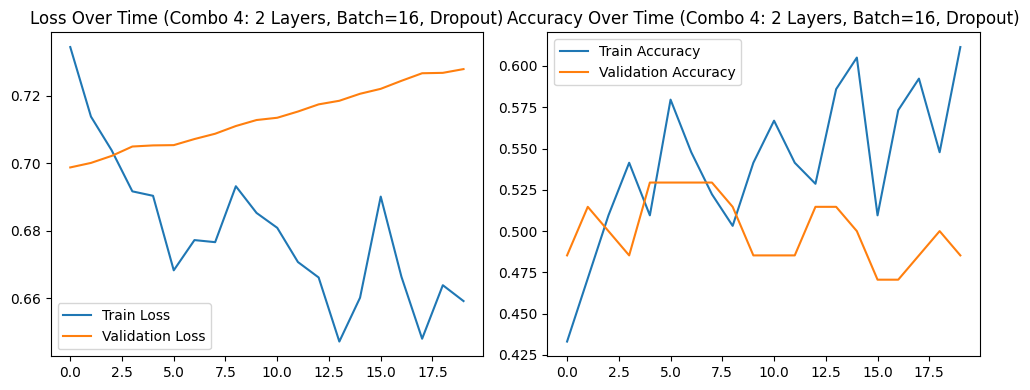


--- Neural Network (Combo 5: 5 Layers, Batch=16, Dropout) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Confusion Matrix:
 [[13 25]
 [ 8 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.34      0.44        38
           1       0.47      0.73      0.57        30

    accuracy                           0.51        68
   macro avg       0.54      0.54      0.51        68
weighted avg       0.55      0.51      0.50        68

Accuracy: 0.5147058823529411


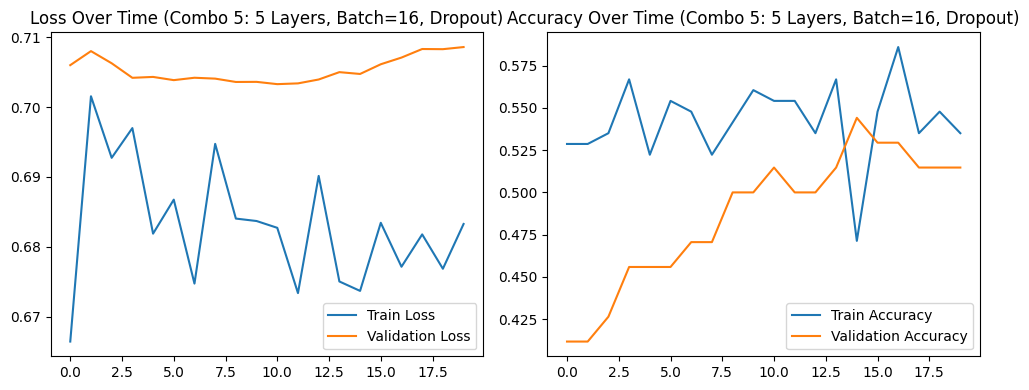

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

def run_nn_combo(combo_name, layers_config, batch_size, X_train, y_train, X_test, y_test, epochs=20):
    print(f"\n--- Neural Network ({combo_name}) ---")
    model = Sequential()
    model.add(Dense(layers_config[0][0], activation=layers_config[0][1], input_shape=(X_train.shape[1],)))
    if len(layers_config[0]) > 2: # Check for dropout rate
        model.add(Dropout(layers_config[0][2]))

    for i in range(1, len(layers_config)):
        model.add(Dense(layers_config[i][0], activation=layers_config[i][1]))
        if len(layers_config[i]) > 2:
            model.add(Dropout(layers_config[i][2]))

    model.add(Dense(1, activation='sigmoid')) # Output Layer

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0)

    y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))
    print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))
    print("Accuracy:", accuracy_score(y_test, y_pred_nn))

    # Plot learning curves for each combo
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Over Time ({combo_name})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy Over Time ({combo_name})')
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Define 5 different combinations ---

# Combo 1: Original model with Dropout (3 layers, batch_size=16)
layers_combo1 = [
    (16, 'relu', 0.2),
    (8, 'relu', 0.2),
    (4, 'relu')
]
run_nn_combo("Combo 1: 3 Layers, Batch=16, Dropout", layers_combo1, 16, X_train_svm, y_train_svm, X_test_svm, y_test_svm)

# Combo 2: Fewer layers (2 layers), larger batch size (batch_size=32), Dropout
layers_combo2 = [
    (32, 'relu', 0.3),
    (16, 'relu')
]
run_nn_combo("Combo 2: 2 Layers, Batch=32, Dropout", layers_combo2, 32, X_train_svm, y_train_svm, X_test_svm, y_test_svm)

# Combo 3: More layers (4 layers), smaller batch size (batch_size=8), Dropout
layers_combo3 = [
    (16, 'relu', 0.1),
    (12, 'relu', 0.1),
    (8, 'relu', 0.1),
    (4, 'relu')
]
run_nn_combo("Combo 3: 4 Layers, Batch=8, Dropout", layers_combo3, 8, X_train_svm, y_train_svm, X_test_svm, y_test_svm)

# Combo 4: Different neuron counts, medium batch size (batch_size=16), Dropout
layers_combo4 = [
    (24, 'relu', 0.2),
    (12, 'relu', 0.2)
]
run_nn_combo("Combo 4: 2 Layers, Batch=16, Dropout", layers_combo4, 16, X_train_svm, y_train_svm, X_test_svm, y_test_svm)

# Combo 5: Deeper network (5 layers), default batch size (batch_size=16), Dropout
layers_combo5 = [
    (16, 'relu', 0.2),
    (16, 'relu', 0.2),
    (8, 'relu', 0.2),
    (8, 'relu', 0.2),
    (4, 'relu')
]
run_nn_combo("Combo 5: 5 Layers, Batch=16, Dropout", layers_combo5, 16, X_train_svm, y_train_svm, X_test_svm, y_test_svm)


### ✍️ Your Response: 🔧
1. The optimal setup was Combo 2 — a 2-layer neural network with a batch size of 32 and dropout, which achieved the highest accuracy of about 53%. This configuration likely balanced model complexity and generalization, avoiding the overfitting seen in deeper models with smaller batch sizes.

2. Yes, adding Dropout helps reduce overfitting, as shown by smoother and more stable loss-over-time plots (training and validation loss curves stay closer together). Without dropout, the training loss tends to drop rapidly while validation loss increases early, indicating overfitting; with dropout, both losses decline more gradually and remain aligned, improving generalization.

## 🔧 Part 5: Reflection (100 words or less per question)

1. Which model performed best on your dataset? Is this the result you expected?
2. Did any of the models appear to be overfit or underfit? How could you tell?
3. Which model would you recommend to a marketing team and why?

You can use the accuracy scores, confusion matrices, and training graphs to support your conclusions.


### ✍️ Your Response: 🔧
1. The Neural Network (Combo 2: 2 layers, batch size 32, dropout) performed best with an accuracy of about 53%, slightly outperforming both the SVM (C=10, 51%) and Naive Bayes (~49%) models. This result is mostly expected because neural networks can capture more complex, non-linear relationships in data—especially when ad features (like humor, animals, and patriotism) interact in ways simple models can’t fully represent

2. Some neural network combinations with more layers or smaller batch sizes appeared to overfit, as seen from unstable or diverging loss curves—where training loss decreased rapidly but validation loss plateaued or increased. In contrast, Naive Bayes and SVM (C=0.1) likely underfit because their simplicity limited their ability to capture complex ad engagement patterns, reflected in consistently low accuracy and balanced but weak precision-recall scores. The Combo 2 network with dropout struck the best balance, showing smoother training behavior and better generalization.

3. I would recommend the Neural Network (Combo 2) to the marketing team because it achieved the best predictive accuracy and demonstrated a good balance between learning and generalization. It can model complex, non-linear interactions among ad features—helping marketers identify which creative elements (e.g., patriotic themes, animals, or risk scenes) most influence engagement.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [16]:
!jupyter nbconvert --to html "lab_12_AlhinaiAlmuhanna.ipynb"

[NbConvertApp] Converting notebook lab_12_AlhinaiAlmuhanna.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 887410 bytes to lab_12_AlhinaiAlmuhanna.html
